<a href="https://colab.research.google.com/github/VanshKodarlikar/Supply-Chain-Inventory-Optimization/blob/main/Supply_Chain_%26_Inventory_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA LOADING**

In [43]:
sales = pd.read_csv('/content/sales.csv')
sales.head()

,date,sku_id,store_id,quantity,revenue
0,2025-04-13,SKU020,STR08,70,14140
1,2025-03-24,SKU011,STR08,166,33034
2,2025-04-14,SKU003,STR06,102,10302
3,2025-03-29,SKU012,STR06,179,52089
4,2025-03-01,SKU001,STR10,71,13348


In [44]:
sales.size

20000

In [45]:
sales.shape

(4000, 5)

In [46]:
inventory=pd.read_csv('/content/inventory.csv')
inventory.head()

,date,sku_id,opening_stock,closing_stock,expiry_date
0,2025-04-04,SKU002,409,220,2025-07-07
1,2025-03-12,SKU009,663,502,2025-07-17
2,2025-01-29,SKU006,675,476,2025-04-06
3,2025-03-04,SKU001,596,401,2025-05-20
4,2025-03-18,SKU014,338,186,2025-09-07


In [47]:
logistics=pd.read_csv('/content/logistics.csv')
logistics.head()

,date,route_id,sku_id,transport_mode,distance_km,cost,delivery_time_days
0,2025-02-17,R003,SKU018,Rail,634,12046,8
1,2025-04-16,R005,SKU003,Rail,959,6713,2
2,2025-01-07,R003,SKU004,Truck,213,2769,9
3,2025-04-02,R011,SKU006,Truck,431,5603,6
4,2025-01-21,R001,SKU019,Truck,286,4576,1


In [48]:
procurement=pd.read_csv('/content/procurement.csv')
procurement.head()

,date,sku_id,supplier,order_qty,lead_time_days,cost
0,2025-01-25,SKU001,SUP05,461,11,17057
1,2025-01-01,SKU010,SUP02,399,13,11172
2,2025-04-04,SKU005,SUP03,479,10,16765
3,2025-03-06,SKU017,SUP02,361,4,8664
4,2025-04-25,SKU007,SUP01,197,9,9456


# **NULL VALUES HANDLING**

In [49]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      4000 non-null   object
 1   sku_id    4000 non-null   object
 2   store_id  4000 non-null   object
 3   quantity  4000 non-null   int64 
 4   revenue   4000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 156.4+ KB


In [50]:
sales.isnull().sum()

,0
date,0
sku_id,0
store_id,0
quantity,0
revenue,0


In [51]:
logistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                4000 non-null   object
 1   route_id            4000 non-null   object
 2   sku_id              4000 non-null   object
 3   transport_mode      4000 non-null   object
 4   distance_km         4000 non-null   int64 
 5   cost                4000 non-null   int64 
 6   delivery_time_days  4000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 218.9+ KB


In [52]:
logistics.isnull().sum()

,0
date,0
route_id,0
sku_id,0
transport_mode,0
distance_km,0
cost,0
delivery_time_days,0


In [53]:
procurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4000 non-null   object
 1   sku_id          4000 non-null   object
 2   supplier        4000 non-null   object
 3   order_qty       4000 non-null   int64 
 4   lead_time_days  4000 non-null   int64 
 5   cost            4000 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [54]:
procurement.isnull().sum()

,0
date,0
sku_id,0
supplier,0
order_qty,0
lead_time_days,0
cost,0


In [55]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4000 non-null   object
 1   sku_id         4000 non-null   object
 2   opening_stock  4000 non-null   int64 
 3   closing_stock  4000 non-null   int64 
 4   expiry_date    4000 non-null   object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB


In [56]:
inventory.isnull().sum()

,0
date,0
sku_id,0
opening_stock,0
closing_stock,0
expiry_date,0


# **NORMALIZATIION**

In [57]:
logistics['transport_mode'] = logistics['transport_mode'].str.lower().str.strip()

# Optional: map to standard categories
mode_map = {
    'truck': 'road',
    'lorry': 'road',
    'air': 'air',
    'air cargo': 'air',
    'rail': 'rail',
    'train': 'rail',
    'ship': 'sea',
    'sea': 'sea',
    'ocean': 'sea'
}

logistics['transport_mode'] = logistics['transport_mode'].replace(mode_map)

In [58]:
logistics.head()

,date,route_id,sku_id,transport_mode,distance_km,cost,delivery_time_days
0,2025-02-17,R003,SKU018,rail,634,12046,8
1,2025-04-16,R005,SKU003,rail,959,6713,2
2,2025-01-07,R003,SKU004,road,213,2769,9
3,2025-04-02,R011,SKU006,road,431,5603,6
4,2025-01-21,R001,SKU019,road,286,4576,1


# **EDA**

In [59]:
# Convert 'date' column to datetime
sales['date'] = pd.to_datetime(sales['date'])
logistics['date'] = pd.to_datetime(logistics['date'])
procurement['date'] = pd.to_datetime(procurement['date'])
inventory['date'] = pd.to_datetime(inventory['date'])



**Monthly sales trend**

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='date'>

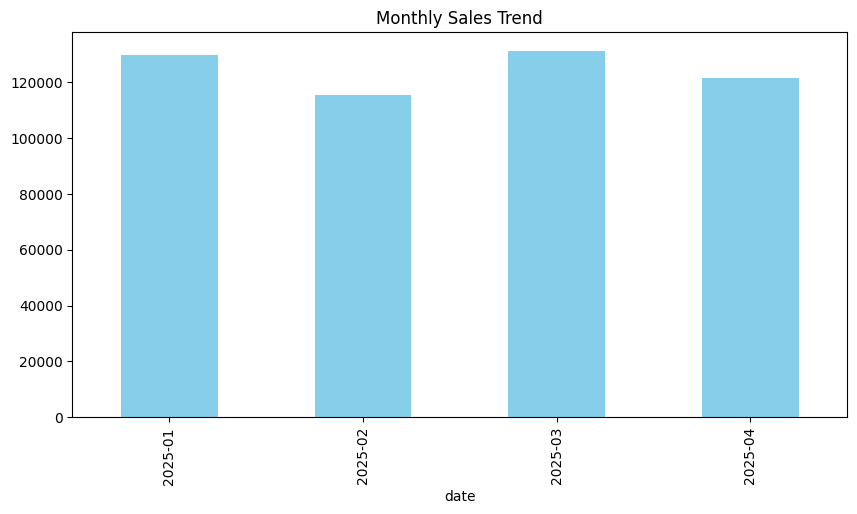

In [60]:
monthly_sales = sales.groupby(sales['date'].dt.to_period("M"))['quantity'].sum()
monthly_sales.plot(kind="bar", color="skyblue", figsize=(10,5), title="Monthly Sales Trend")

**Top SKUs**

In [61]:
top_skus = sales.groupby('sku_id')['quantity'].sum().sort_values(ascending=False).head(10)
print(top_skus)

sku_id
SKU013    29964
SKU015    27238
SKU020    26575
SKU016    26522
SKU008    26228
SKU019    25984
SKU007    25960
SKU017    25784
SKU006    24948
SKU003    24814
Name: quantity, dtype: int64


**Sales by Store**

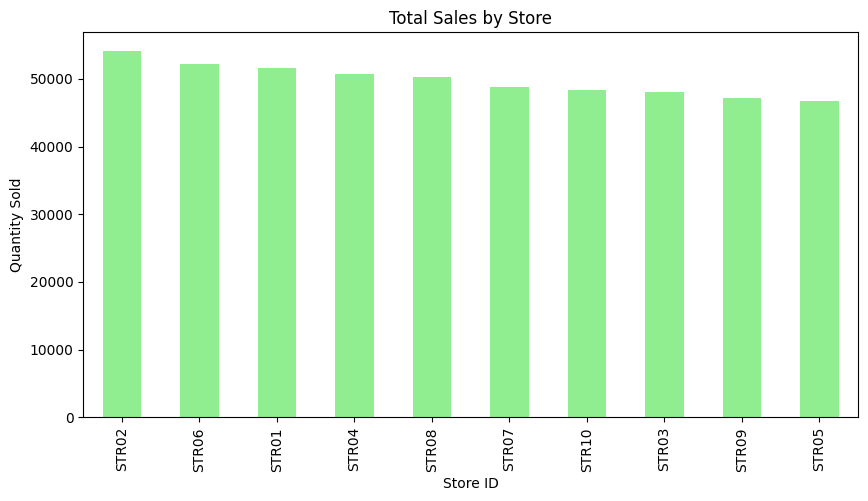

In [62]:
sales_by_store = sales.groupby('store_id')['quantity'].sum().sort_values(ascending=False)
sales_by_store.plot(kind="bar", color="lightgreen", figsize=(10,5), title="Total Sales by Store")
plt.xlabel("Store ID")
plt.ylabel("Quantity Sold")
plt.show()

**Avg Inventory per SKU**

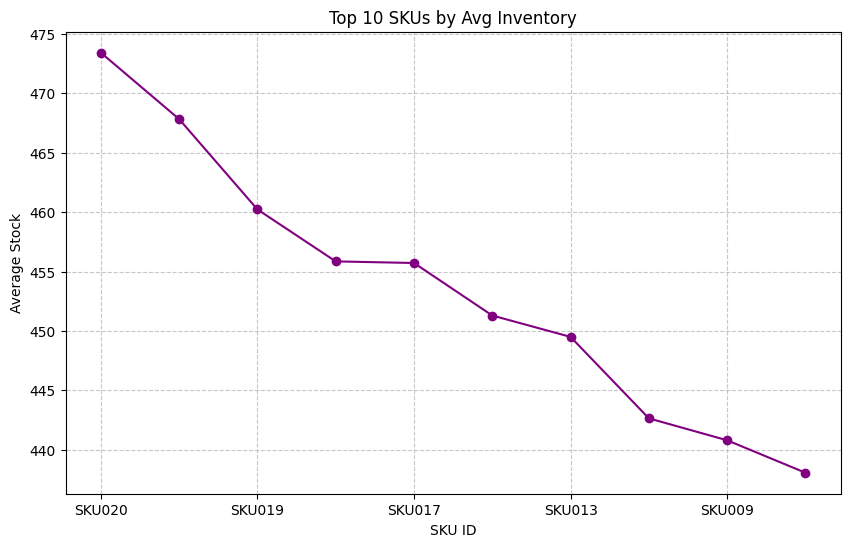

In [63]:
avg_inventory_per_sku.plot(kind="line", marker="o", color="purple", figsize=(10,6))
plt.title("Top 10 SKUs by Avg Inventory")
plt.xlabel("SKU ID")
plt.ylabel("Average Stock")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [64]:
inventory['avg_daily_stock'] = (inventory['opening_stock'] + inventory['closing_stock']) / 2
avg_inventory_per_sku = inventory.groupby('sku_id')['avg_daily_stock'].mean().sort_values(ascending=False).head(10)
print(avg_inventory_per_sku)

sku_id
SKU020    473.408879
SKU005    467.820000
SKU019    460.221649
SKU002    455.851429
SKU017    455.715026
SKU006    451.295918
SKU013    449.497585
SKU007    442.643590
SKU009    440.797436
SKU011    438.068783
Name: avg_daily_stock, dtype: float64


**Avg Lead Time per Supplier**

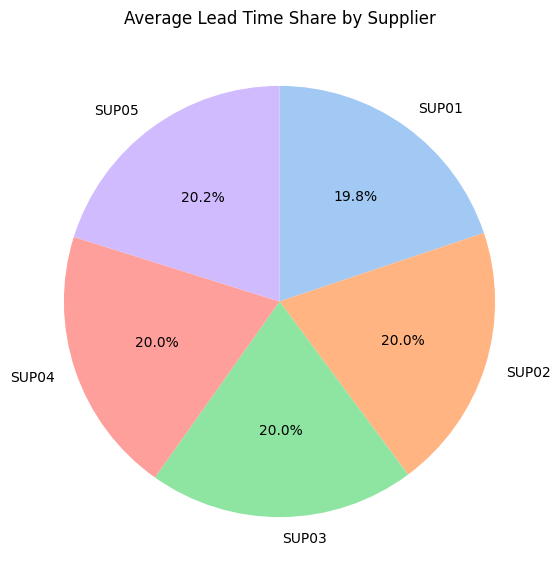

In [65]:
plt.figure(figsize=(7,7))
plt.pie(avg_lead_time, labels=avg_lead_time.index, autopct='%1.1f%%',
        colors=sns.color_palette("pastel"), startangle=90, counterclock=False)
plt.title("Average Lead Time Share by Supplier")
plt.show()

In [66]:
avg_lead_time = procurement.groupby('supplier')['lead_time_days'].mean()
print(avg_lead_time)

supplier
SUP01    8.496094
SUP02    8.555143
SUP03    8.548619
SUP04    8.577020
SUP05    8.630000
Name: lead_time_days, dtype: float64


**Avg Logistics Cost per KM by Mode**

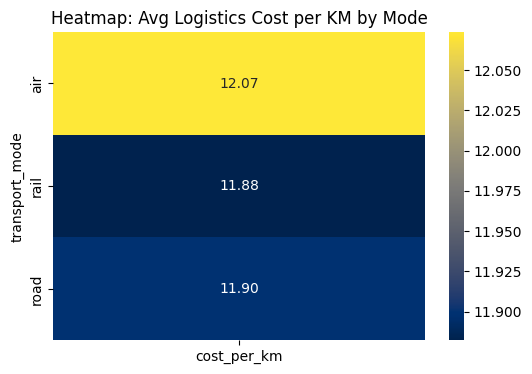

In [67]:
df_cost = cost_by_mode.reset_index()
plt.figure(figsize=(6,4))
sns.heatmap(df_cost.pivot_table(values="cost_per_km", index="transport_mode"),
            annot=True, cmap="cividis", fmt=".2f")
plt.title("Heatmap: Avg Logistics Cost per KM by Mode")
plt.show()

In [68]:
logistics['cost_per_km'] = logistics['cost'] / logistics['distance_km']
cost_by_mode = logistics.groupby('transport_mode')['cost_per_km'].mean().reset_index()
print(cost_by_mode)

  transport_mode  cost_per_km
0            air    12.073518
1           rail    11.882225
2           road    11.899334


**Avg Delivery Time by Mode**

In [69]:
delivery_time_by_mode = logistics.groupby('transport_mode')['delivery_time_days'].mean()
print(delivery_time_by_mode)

transport_mode
air     4.936759
rail    4.997832
road    4.894152
Name: delivery_time_days, dtype: float64


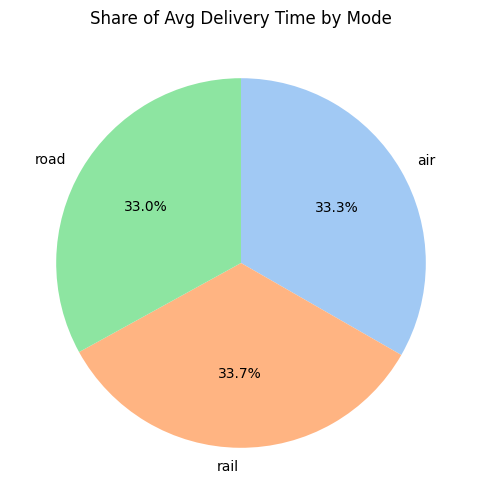

In [70]:
plt.figure(figsize=(6,6))
plt.pie(delivery_time_by_mode, labels=delivery_time_by_mode.index, autopct='%1.1f%%',
        colors=sns.color_palette("pastel"), startangle=90, counterclock=False)
plt.title("Share of Avg Delivery Time by Mode")
plt.show()

# **KPIs**

**Avg Inventory**

In [71]:
inventory['avg_daily_stock'] = (inventory['opening_stock'] + inventory['closing_stock']) / 2

avg_inventory = inventory['avg_daily_stock'].mean()

print("📦 Average Inventory:", avg_inventory)

📦 Average Inventory: 441.565875


**Inventory Turnover Ratio (ITR)**

In [72]:
total_sales = sales['revenue'].sum()

avg_inventory = inventory['avg_daily_stock'].mean()

inventory_turnover = total_sales / avg_inventory

print("📊 Inventory Turnover Ratio:", round(inventory_turnover, 2))

📊 Inventory Turnover Ratio: 223649.18


**Days of Inventory (DOI)**

In [73]:
avg_lead_time_supplier = procurement.groupby('supplier')['lead_time_days'].mean().sort_values()

avg_lead_time_overall = procurement['lead_time_days'].mean()

print("📦 Average Lead Time (Overall):", round(avg_lead_time_overall, 2), "days")
print("\n📦 Average Lead Time by Supplier:\n", avg_lead_time_supplier)


📦 Average Lead Time (Overall): 8.56 days

📦 Average Lead Time by Supplier:
 supplier
SUP01    8.496094
SUP03    8.548619
SUP02    8.555143
SUP04    8.577020
SUP05    8.630000
Name: lead_time_days, dtype: float64


**Supplier Reliability**

In [74]:
promised_lead_time = 7

procurement['on_time'] = procurement['lead_time_days'] <= promised_lead_time

supplier_reliability = procurement.groupby('supplier')['on_time'].mean().sort_values(ascending=False) * 100

print("📦 Supplier Reliability (% On-time Deliveries):\n", supplier_reliability)

📦 Supplier Reliability (% On-time Deliveries):
 supplier
SUP04    41.035354
SUP01    40.625000
SUP03    39.855942
SUP02    39.653036
SUP05    38.750000
Name: on_time, dtype: float64


**Average Logistics Cost per KM**

In [75]:
logistics['cost_per_km'] = logistics['cost'] / logistics['distance_km']

avg_cost_per_km = logistics.groupby('transport_mode')['cost_per_km'].mean().sort_values()

print("🚚 Avg Logistics Cost per KM by Mode:\n", avg_cost_per_km)


🚚 Avg Logistics Cost per KM by Mode:
 transport_mode
rail    11.882225
road    11.899334
air     12.073518
Name: cost_per_km, dtype: float64


**On-Time Delivery % (OTD)**

In [76]:
promised_delivery_days = 5

logistics['on_time'] = logistics['delivery_time_days'] <= promised_delivery_days

on_time_delivery = logistics.groupby('transport_mode')['on_time'].mean() * 100

print("🚚 On-Time Delivery % by Mode:\n", on_time_delivery)

🚚 On-Time Delivery % by Mode:
 transport_mode
air     55.731225
rail    54.841040
road    58.327165
Name: on_time, dtype: float64


**Average Order Value (AOV)**

In [77]:
aov = sales['revenue'].mean()
print("📊 Average Order Value (AOV):", round(aov, 2))

📊 Average Order Value (AOV): 24688.96


**Stockout Risk per SKU**

In [78]:
daily_sales_sku = sales.groupby('sku_id')['revenue'].mean()

inventory['avg_daily_stock'] = (inventory['opening_stock'] + inventory['closing_stock'])/2
avg_inventory_sku = inventory.groupby('sku_id')['avg_daily_stock'].mean()

stockout_risk = avg_inventory_sku / daily_sales_sku
stockout_risk = stockout_risk.sort_values().head(10)  # Top 10 risky SKUs

print("⚠️ Top 10 SKUs at Stockout Risk:\n", stockout_risk)


⚠️ Top 10 SKUs at Stockout Risk:
 sku_id
SKU014    0.016507
SKU003    0.016653
SKU010    0.016885
SKU016    0.016932
SKU018    0.017310
SKU008    0.017525
SKU012    0.017583
SKU015    0.017588
SKU017    0.017633
SKU006    0.017717
dtype: float64


# **RECOMMENDATION MODEL**

**Reorder Point & Order Recommendation**

In [81]:
forecast_summary = sales.groupby('sku_id')['revenue'].mean().reset_index()
forecast_summary.rename(columns={'revenue':'avg_daily_demand'}, inplace=True)

In [85]:
# Inventory Data
inventory['avg_daily_stock'] = (inventory['opening_stock'] + inventory['closing_stock']) / 2
avg_inventory = inventory.groupby('sku_id')['avg_daily_stock'].mean().reset_index()

# Supplier Lead Time
avg_lead_time = procurement.groupby('supplier')['lead_time_days'].mean().reset_index()

sku_suppliers = procurement[['sku_id','supplier']].drop_duplicates()

# Merge everything
reco_data = forecast_summary.merge(avg_inventory, on='sku_id', how='left')
reco_data = reco_data.merge(sku_suppliers, on='sku_id', how='left')
reco_data = reco_data.merge(avg_lead_time, on='supplier', how='left')

# Reorder Point Calculation
reco_data['reorder_point'] = (reco_data['avg_daily_demand'] * reco_data['lead_time_days'])
reco_data['safety_stock'] = 0.2 * reco_data['reorder_point']  # 20% buffer
reco_data['reorder_point'] = reco_data['reorder_point'] + reco_data['safety_stock']

reco_data['order_needed'] = reco_data['avg_daily_stock'] < reco_data['reorder_point']

# Calculate Recommended Order Quantity
reco_data['recommended_order_qty'] = reco_data['reorder_point'] - reco_data['avg_daily_stock']
reco_data['recommended_order_qty'] = reco_data['recommended_order_qty'].apply(lambda x: max(x,0))

# Final Recommendation Table
recommendations = reco_data[['sku_id','supplier','avg_daily_demand','avg_daily_stock',
                             'lead_time_days','reorder_point','recommended_order_qty','order_needed']]

print("📦 Replenishment Recommendations:\n")
print(recommendations.head(15))

📦 Replenishment Recommendations:

    sku_id supplier  avg_daily_demand  avg_daily_stock  lead_time_days  \
0   SKU001    SUP05      23321.789474       421.059459        8.630000   
1   SKU001    SUP02      23321.789474       421.059459        8.555143   
2   SKU001    SUP03      23321.789474       421.059459        8.548619   
3   SKU001    SUP01      23321.789474       421.059459        8.496094   
4   SKU001    SUP04      23321.789474       421.059459        8.577020   
5   SKU002    SUP01      23901.497297       455.851429        8.496094   
6   SKU002    SUP04      23901.497297       455.851429        8.577020   
7   SKU002    SUP05      23901.497297       455.851429        8.630000   
8   SKU002    SUP02      23901.497297       455.851429        8.555143   
9   SKU002    SUP03      23901.497297       455.851429        8.548619   
10  SKU003    SUP02      26099.427083       434.635000        8.555143   
11  SKU003    SUP03      26099.427083       434.635000        8.548619   
12  

**Transport Mode Recommendation**

In [86]:
# Calculate avg delivery time & cost per km per mode
logistics['cost_per_km'] = logistics['cost'] / logistics['distance_km']

mode_stats = logistics.groupby('transport_mode').agg({
    'delivery_time_days':'mean',
    'cost_per_km':'mean'
}).reset_index()

# Simple business rules for recommendation
def recommend_mode(urgency, mode_stats):
    """
    urgency: 'high' (stockout risk) or 'low' (enough buffer stock)
    mode_stats: dataframe with transport mode performance
    """
    if urgency == "high":
        # choose the FASTEST transport mode
        return mode_stats.sort_values('delivery_time_days').iloc[0]['transport_mode']
    else:
        # choose the CHEAPEST transport mode
        return mode_stats.sort_values('cost_per_km').iloc[0]['transport_mode']

# Add transport recommendation to SKU orders
recommendations['urgency'] = recommendations['order_needed'].apply(lambda x: "high" if x else "low")
recommendations['transport_mode'] = recommendations['urgency'].apply(lambda x: recommend_mode(x, mode_stats))

# Final Supply Chain Recommendation
final_recommendations = recommendations[['sku_id','supplier','avg_daily_demand','avg_daily_stock',
                                         'lead_time_days','reorder_point','recommended_order_qty',
                                         'urgency','transport_mode']]

print("🚀 Final Supply Chain Recommendations:\n")
print(final_recommendations.head(15))


🚀 Final Supply Chain Recommendations:

    sku_id supplier  avg_daily_demand  avg_daily_stock  lead_time_days  \
0   SKU001    SUP05      23321.789474       421.059459        8.630000   
1   SKU001    SUP02      23321.789474       421.059459        8.555143   
2   SKU001    SUP03      23321.789474       421.059459        8.548619   
3   SKU001    SUP01      23321.789474       421.059459        8.496094   
4   SKU001    SUP04      23321.789474       421.059459        8.577020   
5   SKU002    SUP01      23901.497297       455.851429        8.496094   
6   SKU002    SUP04      23901.497297       455.851429        8.577020   
7   SKU002    SUP05      23901.497297       455.851429        8.630000   
8   SKU002    SUP02      23901.497297       455.851429        8.555143   
9   SKU002    SUP03      23901.497297       455.851429        8.548619   
10  SKU003    SUP02      26099.427083       434.635000        8.555143   
11  SKU003    SUP03      26099.427083       434.635000        8.548619   

In [88]:
recommendations.to_csv("recommendations.csv", index=False)
final_recommendations.to_csv("final_recommendations.csv", index=False)
forecast_summary.to_csv("forecast_summary.csv", index=False)